# 1 - Introducción a pandas + numpy + matplotlib

Revisamos algunos **conceptos iniciales** de estas librerías para empezar a analizar datos. Para un tutorial inicial más completo ver: [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Los objetos de pandas: Series

Se puede construir un objeto `Series` con cualquier serie de valores. Las `Series` pueden entenderse como listas con **funcionalides adicionales**.

In [193]:
s = pd.Series([1,3,5,np.nan,6,8])

In [194]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [18]:
print "Suma:", s.sum(), "/ Cantidad de valores:", s.count()

Suma: 23.0 / Cantidad de valores: 5


Las operaciones sobre `Series` son distintas que las operaciones sobre listas.

In [195]:
s * 2

0     2.0
1     6.0
2    10.0
3     NaN
4    12.0
5    16.0
dtype: float64

In [198]:
list(s) * 2

[1.0, 3.0, 5.0, nan, 6.0, 8.0, 1.0, 3.0, 5.0, nan, 6.0, 8.0]

Las `Series` pueden tener índices, además del mero índice posicional. Por ejemplo, se puede especificar un **índice temporal**.

In [19]:
# en este caso elegimos crear una serie de tiempo
s2 = pd.Series([1,3,5,np.nan,6,8], pd.date_range("20161123", "20161128"))
s2

2016-11-23    1.0
2016-11-24    3.0
2016-11-25    5.0
2016-11-26    NaN
2016-11-27    6.0
2016-11-28    8.0
Freq: D, dtype: float64

Se puede **forzar un tipo de datos** distinto del interpretado por `pandas`.

In [200]:
s3 = pd.Series([1,3,5,np.nan,6,8], pd.date_range("20161123", "20161128"), dtype=str)
s3

2016-11-23      1
2016-11-24      3
2016-11-25      5
2016-11-26    NaN
2016-11-27      6
2016-11-28      8
Freq: D, dtype: object

## 1.2 Los objetos de pandas: DataFrame

Un `DataFrame` es un **conjunto de series** que tienen (a) el mismo índice y (b) la misma cantidad de valores (conformando una tabla).

In [201]:
df = pd.DataFrame({
        "serie_2": s2, 
        "serie_3": s3,
        "serie_4": [4, 3, 2, 23, 15, 30],
        "serie_5": np.array([300] * 6, dtype='int32')
    })
df

,serie_2,serie_3,serie_4,serie_5
2016-11-23,1.0,1,4,300
2016-11-24,3.0,3,3,300
2016-11-25,5.0,5,2,300
2016-11-26,NaN,NaN,23,300
2016-11-27,6.0,6,15,300
2016-11-28,8.0,8,30,300


Hay muchas formas de crear un `DataFrame`... `pandas` tiene toda una serie de **funciones para leer distintos tipos de archivos tabulares** y cargarlos en un `DataFrame`.

In [25]:
df_personas = pd.read_csv("data/dataframe_example.csv")
df_personas

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
2,15,Carlos Hale,M
3,10,Sofía Cilar,F


Las **columnas y las filas pueden utilizarse individualmente como series**. En el caso de las columnas, si no se utilizan espacios en los encabezados, incluso se pueden llamar como cualquier otro atributo de un `DataFrame`.

In [27]:
df_personas.sexo

0    M
1    F
2    M
3    F
Name: sexo, dtype: object

In [35]:
df_personas.sexo.unique()

array(['M', 'F'], dtype=object)

In [37]:
# devuelve algunas estadísticas sumarias de los campos numéricos
df_personas.describe()

,numero
count,4.000000
mean,117.250000
std,145.493127
min,10.000000
25%,13.750000
50%,69.000000
75%,172.500000
max,321.000000


### 1.2.1 Ordenar un DataFrame

Podemos ordenar un `DataFrame` **por los valores de sus columnas**.

In [38]:
df_personas.sort_values("nombre_apellido")

,numero,nombre_apellido,sexo
2,15,Carlos Hale,M
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
3,10,Sofía Cilar,F


In [39]:
df_personas.sort_values("numero")

,numero,nombre_apellido,sexo
3,10,Sofía Cilar,F
2,15,Carlos Hale,M
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F


Podemos ordenar un `DataFrame` **por los valores de sus índices**.

In [44]:
# ordena las filas
df_personas.sort_index(axis=0, ascending=False)

,numero,nombre_apellido,sexo
3,10,Sofía Cilar,F
2,15,Carlos Hale,M
1,321,Lucía Alvarez,F
0,123,Juan Pérez,M


In [43]:
# ordena las columnas
df_personas.sort_index(axis=1, ascending=False)

,sexo,numero,nombre_apellido
0,M,123,Juan Pérez
1,F,321,Lucía Alvarez
2,M,15,Carlos Hale
3,F,10,Sofía Cilar


### 1.2.2 Seleccionar elementos en un DataFrame

#### Selección directa usando **[   ]**

Seleccionando columnas

In [206]:
df_personas["sexo"] # sobre una columna (equivalente a `df_personas.sexo`)

0    M
1    F
2    M
3    F
Name: sexo, dtype: object

In [203]:
df_personas[["sexo", "nombre_apellido"]] # sobre varias columnas

,sexo,nombre_apellido
0,M,Juan Pérez
1,F,Lucía Alvarez
2,M,Carlos Hale
3,F,Sofía Cilar


Seleccionando filas

In [57]:
df[0:2] # por número de fila

,serie_2,serie_3,serie_4,serie_5
2016-11-23,1.0,1,0,300
2016-11-24,3.0,3,1,300


In [58]:
df["20161124":"20161126"] # por label (índice) de fila

,serie_2,serie_3,serie_4,serie_5
2016-11-24,3.0,3,1,300
2016-11-25,5.0,5,2,300
2016-11-26,NaN,NaN,3,300


#### Selección por labels de [filas, columnas]

In [214]:
df.loc["20161124", "serie_3"] # seleccionar un valor (celda)

3

In [218]:
df.loc["20161124":"20161125", ["serie_3", "serie_5"]] # seleccionar un subjconjunto de valores

,serie_3,serie_5
2016-11-24,3,300
2016-11-25,5,300


#### Selección por posición de [filas, columnas]

In [66]:
df.iloc[1, 3] # seleccionar un valor (celda)

300

In [71]:
df.iloc[1:3, 2:4] # seleccionar un subjconjunto de valores (rangos)

,serie_4,serie_5
2016-11-24,1,300
2016-11-25,2,300


In [75]:
df.iloc[[1, 2, 5], [2, 3]] # seleccionar un subjconjunto de valores (listas)

,serie_4,serie_5
2016-11-24,1,300
2016-11-25,2,300
2016-11-28,5,300


#### Selección por expresión booleana

In [85]:
df_personas.sexo == "M"

0     True
1    False
2     True
3    False
Name: sexo, dtype: bool

In [219]:
df_personas[df_personas.sexo == "M"] # expresión sobre una columna

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
2,15,Carlos Hale,M


In [220]:
df_personas[[True, False, True, False]]

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
2,15,Carlos Hale,M


In [87]:
df[df > 3] # máscara sobre todos los valores del DataFrame

,serie_2,serie_3,serie_4,serie_5
2016-11-23,NaN,NaN,NaN,300
2016-11-24,NaN,NaN,NaN,300
2016-11-25,5.0,5,NaN,300
2016-11-26,NaN,NaN,NaN,300
2016-11-27,6.0,6,4.0,300
2016-11-28,8.0,8,5.0,300


In [221]:
df[(df > 3) & (df < 300)] # se pueden concatenar condiciones ("&" -> "and"    "|" -> "or")

,serie_2,serie_3,serie_4,serie_5
2016-11-23,NaN,NaN,4.0,NaN
2016-11-24,NaN,NaN,NaN,NaN
2016-11-25,5.0,5,NaN,NaN
2016-11-26,NaN,NaN,23.0,NaN
2016-11-27,6.0,6,15.0,NaN
2016-11-28,8.0,8,30.0,NaN


### 1.2.3 Setear elementos en un DataFrame

Setear una nueva serie/columna automáticamente ubica los elementos en el lugar que le corresponden según el índice de la serie y del DataFrame. Los elementos que exceden el índice del DataFrame no se incorporan.

In [222]:
s4 = pd.Series([4, 3, 2, 6, 7, 5], index=pd.date_range('20161126', periods=6))
s4

2016-11-26    4
2016-11-27    3
2016-11-28    2
2016-11-29    6
2016-11-30    7
2016-12-01    5
Freq: D, dtype: int64

In [138]:
df["serie_6"] = s4
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,0,arbol,NaN
2016-11-24,3.0,3,1,arbol,NaN
2016-11-25,5.0,5,2,arbol,NaN
2016-11-26,NaN,NaN,3,arbol,4.0
2016-11-27,6.0,6,4,arbol,3.0
2016-11-28,8.0,8,5,arbol,2.0


Los mismos atributos que **permiten seleccionar valores, permiten setear valores**.

In [120]:
df.loc[:, "serie_5"] = 500
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,0,500,NaN
2016-11-24,3.0,3,1,500,NaN
2016-11-25,5.0,5,2,500,NaN
2016-11-26,NaN,NaN,3,500,0.0
2016-11-27,6.0,6,4,500,1.0
2016-11-28,8.0,8,5,500,2.0


In [121]:
df.loc["20161126", "serie_5"] = 900
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,0,500,NaN
2016-11-24,3.0,3,1,500,NaN
2016-11-25,5.0,5,2,500,NaN
2016-11-26,NaN,NaN,3,900,0.0
2016-11-27,6.0,6,4,500,1.0
2016-11-28,8.0,8,5,500,2.0


In [140]:
df.iloc[:, 3] = "arbol"
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,0,arbol,NaN
2016-11-24,3.0,3,1,arbol,NaN
2016-11-25,5.0,5,2,arbol,NaN
2016-11-26,NaN,NaN,3,arbol,4.0
2016-11-27,6.0,6,4,arbol,3.0
2016-11-28,8.0,8,5,arbol,2.0


### 1.2.4 Agrupar por categorías

In [223]:
df_personas

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
2,15,Carlos Hale,M
3,10,Sofía Cilar,F


In [224]:
df_personas.groupby("sexo").count()

,numero,nombre_apellido
sexo,,
F,2,2
M,2,2


In [226]:
df_personas_nan = df_personas.copy()
df_personas_nan.loc[0, "numero"] = np.nan
df_personas_nan

,numero,nombre_apellido,sexo
0,NaN,Juan Pérez,M
1,321.0,Lucía Alvarez,F
2,15.0,Carlos Hale,M
3,10.0,Sofía Cilar,F


In [227]:
df_personas_nan.groupby("sexo").count()

,numero,nombre_apellido
sexo,,
F,2,2
M,1,2


## 1.3 Graficar

Los objetos de `pandas` tienen un atributo `plot` que es un **wrapper sobre matplotlib, que simplifica la creación de gráficos**.

In [132]:
# para que jupyter grafique en la celda de output
%matplotlib inline
plt.style.use("ggplot") # para que los gráficos sean más lindos

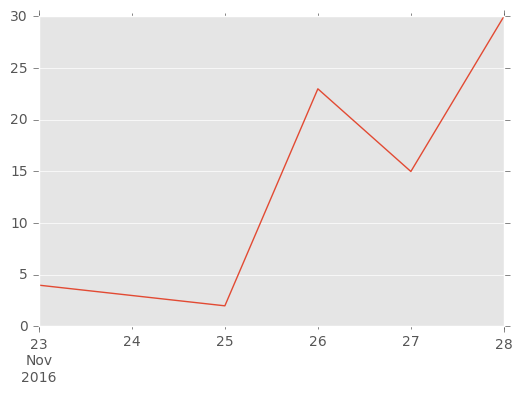

In [148]:
df.serie_4.plot.line()

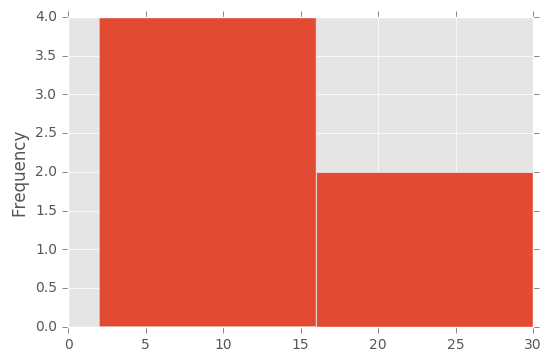

In [149]:
df.serie_4.plot.hist(bins=2)

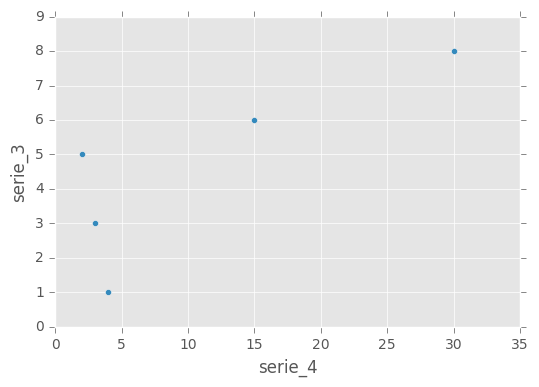

In [152]:
df.plot.scatter("serie_4", "serie_3")

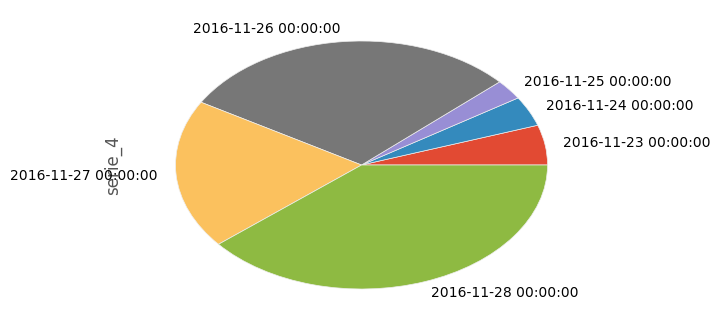

In [156]:
df.plot.pie("serie_4", legend=False)

## 1.4 Mergear

### 1.4.1 Concat

Vamos a extender la información de un dataframe concatenándolo con otro que tiene **nuevas filas**.

In [161]:
df_personas

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
2,15,Carlos Hale,M
3,10,Sofía Cilar,F


In [162]:
df_personas2 = pd.DataFrame({
        "numero": [400],
        "nombre_apellido": ["Ignacio Heredia"],
        "sexo": ["M"]
    })
df_personas2

,nombre_apellido,numero,sexo
0,Ignacio Heredia,400,M


In [167]:
# concatena dataframes "uno arriba del otro"
df_personas_concat = pd.concat([df_personas, df_personas2], ignore_index=True)
df_personas_concat

,nombre_apellido,numero,sexo
0,Juan Pérez,123,M
1,Lucía Alvarez,321,F
2,Carlos Hale,15,M
3,Sofía Cilar,10,F
4,Ignacio Heredia,400,M


Vamos a extender la información de un dataframe concatenándolo con otro que tiene **nuevas columnas**.

In [169]:
df_personas3 = pd.DataFrame({"profesion": ["programador"]*3 + ["artista"]*2})

# axis = 1 para concatenar dataframes "uno al lado del otro"
pd.concat([df_personas_concat, df_personas3], axis=1)

,nombre_apellido,numero,sexo,profesion
0,Juan Pérez,123,M,programador
1,Lucía Alvarez,321,F,programador
2,Carlos Hale,15,M,programador
3,Sofía Cilar,10,F,artista
4,Ignacio Heredia,400,M,artista


### 1.4.2 Merge

Vamos a mergear un dataframe con otro que contiene el nombre de los días de la semana, utilizando el índice de tiempo que tienen los dos.

In [171]:
df

,serie_2,serie_3,serie_4,serie_5
2016-11-23,1.0,1,4,300
2016-11-24,3.0,3,3,300
2016-11-25,5.0,5,2,300
2016-11-26,NaN,NaN,23,300
2016-11-27,6.0,6,15,300
2016-11-28,8.0,8,30,300


In [177]:
date_range = pd.date_range("20161120", periods=10)

In [186]:
df_dia_semana_ingles = pd.DataFrame({"dia_semana_ingles": date_range.weekday_name}, index=date_range)
df_dia_semana_ingles

,dia_semana_ingles
2016-11-20,Sunday
2016-11-21,Monday
2016-11-22,Tuesday
2016-11-23,Wednesday
2016-11-24,Thursday
2016-11-25,Friday
2016-11-26,Saturday
2016-11-27,Sunday
2016-11-28,Monday
2016-11-29,Tuesday


In [191]:
# "left": el dataframe principal es el de la izquierda
merged_dia_semana = pd.merge(
    df, df_dia_semana_ingles, left_index=True, right_index=True, how="left")
merged_dia_semana

,serie_2,serie_3,serie_4,serie_5,dia_semana_ingles
2016-11-23,1.0,1,4,300,Wednesday
2016-11-24,3.0,3,3,300,Thursday
2016-11-25,5.0,5,2,300,Friday
2016-11-26,NaN,NaN,23,300,Saturday
2016-11-27,6.0,6,15,300,Sunday
2016-11-28,8.0,8,30,300,Monday


In [192]:
# "right": el dataframe principal es el de la derecha
pd.merge(df, df_dia_semana, left_index=True, right_index=True, how="right")

,serie_2,serie_3,serie_4,serie_5,dia_semana_ingles
2016-11-20,NaN,NaN,NaN,NaN,Sunday
2016-11-21,NaN,NaN,NaN,NaN,Monday
2016-11-22,NaN,NaN,NaN,NaN,Tuesday
2016-11-23,1.0,1,4.0,300.0,Wednesday
2016-11-24,3.0,3,3.0,300.0,Thursday
2016-11-25,5.0,5,2.0,300.0,Friday
2016-11-26,NaN,NaN,23.0,300.0,Saturday
2016-11-27,6.0,6,15.0,300.0,Sunday
2016-11-28,8.0,8,30.0,300.0,Monday
2016-11-29,NaN,NaN,NaN,NaN,Tuesday


Vamos a mergear dos dataframes utilizando una columna que tienen en común, para traducir los días de la semana al español.

In [189]:
traduccion_dia_semana = pd.DataFrame({
    "dia_semana_ingles": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    "dia_semana_español": ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
})
traduccion_dia_semana

,dia_semana_español,dia_semana_ingles
0,Lunes,Monday
1,Martes,Tuesday
2,Miércoles,Wednesday
3,Jueves,Thursday
4,Viernes,Friday
5,Sábado,Saturday
6,Domingo,Sunday


In [190]:
pd.merge(merged_dia_semana, traduccion_dia_semana, on="dia_semana_ingles", how="left")

,serie_2,serie_3,serie_4,serie_5,dia_semana_ingles,dia_semana_español
0,1.0,1,4,300,Wednesday,Miércoles
1,3.0,3,3,300,Thursday,Jueves
2,5.0,5,2,300,Friday,Viernes
3,NaN,NaN,23,300,Saturday,Sábado
4,6.0,6,15,300,Sunday,Domingo
5,8.0,8,30,300,Monday,Lunes
